In [0]:
class Graph():
  def __init__(self):
    '''Function creates graph object.'''
    self.vertices = dict()
    self.edges = []

  def addVertex(self,vert):
    '''Function adds vertex to the graph object.
    
    Keyword arguments:
    vert -- vertex label
    '''
    if vert not in self.vertices.keys():
        self.vertices[vert] = []
    else:
      print("Node exist in the graph!")

  def getVertices(self):
    '''Function return list of vertices.'''
    return self.vertices.keys()

  def addVerticesFromList(self,vertList):
    '''Function adds all vertices from list to the graph object.
    
    Keyword arguments:
    vertList -- list of vertices
    '''
    if type(vertList)!=list:
      print('Argument must be type list')
      pass
    
    for vertex in vertList:
      self.addVertex(vertex)

  def addEdge(self,vert1,vert2,*weight):
    '''Function adds weighted edge between vertices in the graph 
    object. Add new vertices to vertices list. 
    
    Keyword arguments:
    vert1 -- first vertex label
    vert2 -- second vertex label
    *weight -- weight of edge
    '''
    if (vert1,vert2,*weight) in self.edges:
      print ("Edge exists in the graph")
      pass

    if vert1 not in self.vertices:
      self.vertices[vert1]=[vert2]
    else:
      self.vertices[vert1].append(vert2)

    if vert2 not in self.vertices:
      self.vertices[vert2]=[vert1]
    else:
      self.vertices[vert2].append(vert1)
    
    self.edges.append((vert1,vert2,*weight))

  def getEdges(self):
    '''Function returs list of edges in the graph.'''
    return self.edges

  def addEdgesFromList(self,edgeList):
    '''Function adds edges from the list to the graph.

    Keyword arguments:
    edgeList -- list of edges, elements are tuples
    '''
    if type(edgeList)!=list:
      print("Argument must be type list")
      pass

    for element in edgeList:
      if type(element)!=tuple:
        print("List must contain elements type tuple")
        pass
        
    for edge in edgeList:
      if len(edge)==3:
        self.addEdge(edge[0],edge[1],edge[2])
      elif len(edge)==2:
        self.addEdge(edge[0],edge[1])

  def getNeighbors(self,vertKey):
    '''Function returns the list of neighbors of vertex
    from function argument.

    Keyword arguments:
    vertKey -- label of vertex
    '''
    return self.vertices[vertKey]

  def __contains__(self,vert):
    '''Function returns True if vertex from argument is in the graph
    or False otherwise.

    Keyword arguments:
    vert -- label of vertex
    '''
    if vert in self.vertices:
      return True
    else:
      return False
  

  def saveGraph(self,graph):
    '''Function creates text file with graph in dot language.

    Keyword arguments:
    graph -- name of file
    '''
    seperator = ''
    graphviz_dot_file = open(seperator.join((graph,".txt")),"w") 
    graphviz_dot_file.write("graph G0 { \n")
    for element in self.edges:
      graphviz_dot_file.write(seperator.join((element[0],'--',element[1],'\n')))
    graphviz_dot_file.write("}")
    graphviz_dot_file.close()

  def getShortestPaths(self,fromVert):
    '''Function creates dictionary  shortest paths in the graph 
    from the given vertex to all other vertices.

    Keyword arguments:
    fromVert -- label of start vertex
    '''
    neighbors_dict = dict()
    path = 1
    neighbors = self.getNeighbors(fromVert)
    for node in neighbors:
      neighbors_dict[node] = path
    while True:
      neighbors_neighbors = []    # list of neighbors of neighbors
      for node in neighbors:
        neighbors = self.getNeighbors(node)
        for element in neighbors:
          neighbors_neighbors.append(element)
      new_neighbor = 0  # counter on new nodes in step in loop
      path += 1   # length of path in this step
      for element in neighbors_neighbors:
        if element not in neighbors_dict:
          if element != fromVert:   
            neighbors_dict[element] = path
            new_neighbor += 1
      if new_neighbor == 0:
        break     # break if there is no new path
      neighbors = neighbors_neighbors
    return neighbors_dict

In [0]:
g = Graph()

In [0]:
g.addVertex('Alice')
g.addVerticesFromList(['Bob', 'Carl'])

In [0]:
g.addEdge('Alice','Bob')
g.addEdgesFromList([('Carl','Alice',1),('Alice','David'),('Alice','Ernst'),('Alice','Frank'),('Bob','Gail'),('Gail','Harry'),('Harry','Jen'),('Jen','Gail'),('Harry','Irene'),('Irene','Gail'),('Irene','Jen'),('Ernst','Frank'),('David','Carl'),('Carl','Frank')])

In [168]:
g.getEdges()

[('Alice', 'Bob'),
 ('Carl', 'Alice', 1),
 ('Alice', 'David'),
 ('Alice', 'Ernst'),
 ('Alice', 'Frank'),
 ('Bob', 'Gail'),
 ('Gail', 'Harry'),
 ('Harry', 'Jen'),
 ('Jen', 'Gail'),
 ('Harry', 'Irene'),
 ('Irene', 'Gail'),
 ('Irene', 'Jen'),
 ('Ernst', 'Frank'),
 ('David', 'Carl'),
 ('Carl', 'Frank')]

In [169]:
g.getVertices()

dict_keys(['Alice', 'Bob', 'Carl', 'David', 'Ernst', 'Frank', 'Gail', 'Harry', 'Jen', 'Irene'])

In [170]:
"Patrycja" in g

False

In [171]:
'Jen' in g

True

In [0]:
g.saveGraph("graphviz_dot_file")

In [173]:
file2 = open('graphviz_dot_file.txt',"r") 
print(file2.read())

graph G0 { 
Alice--Bob
Carl--Alice
Alice--David
Alice--Ernst
Alice--Frank
Bob--Gail
Gail--Harry
Harry--Jen
Jen--Gail
Harry--Irene
Irene--Gail
Irene--Jen
Ernst--Frank
David--Carl
Carl--Frank
}


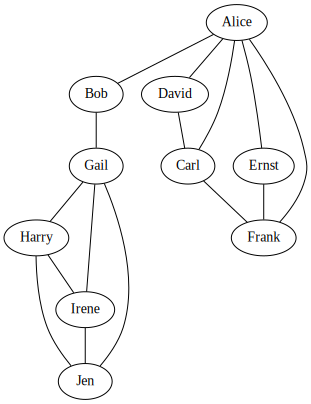

In [174]:
from graphviz import Source

text_from_file = str()
with open('graphviz_dot_file.txt') as file:
    text_from_file = file.read()

src = Source(text_from_file)
src

In [175]:
for node in g.getVertices():
  print(node, ':', g.getNeighbors(node))

Alice : ['Bob', 'Carl', 'David', 'Ernst', 'Frank']
Bob : ['Alice', 'Gail']
Carl : ['Alice', 'David', 'Frank']
David : ['Alice', 'Carl']
Ernst : ['Alice', 'Frank']
Frank : ['Alice', 'Ernst', 'Carl']
Gail : ['Bob', 'Harry', 'Jen', 'Irene']
Harry : ['Gail', 'Jen', 'Irene']
Jen : ['Harry', 'Gail', 'Irene']
Irene : ['Harry', 'Gail', 'Jen']


In [176]:
for node in g.getVertices():
  print(node, ':', g.getShortestPaths(node))

Alice : {'Bob': 1, 'Carl': 1, 'David': 1, 'Ernst': 1, 'Frank': 1, 'Gail': 2, 'Harry': 3, 'Jen': 3, 'Irene': 3}
Bob : {'Alice': 1, 'Gail': 1, 'Carl': 2, 'David': 2, 'Ernst': 2, 'Frank': 2, 'Harry': 2, 'Jen': 2, 'Irene': 2}
Carl : {'Alice': 1, 'David': 1, 'Frank': 1, 'Bob': 2, 'Ernst': 2, 'Gail': 3, 'Harry': 4, 'Jen': 4, 'Irene': 4}
David : {'Alice': 1, 'Carl': 1, 'Bob': 2, 'Ernst': 2, 'Frank': 2, 'Gail': 3, 'Harry': 4, 'Jen': 4, 'Irene': 4}
Ernst : {'Alice': 1, 'Frank': 1, 'Bob': 2, 'Carl': 2, 'David': 2, 'Gail': 3, 'Harry': 4, 'Jen': 4, 'Irene': 4}
Frank : {'Alice': 1, 'Ernst': 1, 'Carl': 1, 'Bob': 2, 'David': 2, 'Gail': 3, 'Harry': 4, 'Jen': 4, 'Irene': 4}
Gail : {'Bob': 1, 'Harry': 1, 'Jen': 1, 'Irene': 1, 'Alice': 2, 'Carl': 3, 'David': 3, 'Ernst': 3, 'Frank': 3}
Harry : {'Gail': 1, 'Jen': 1, 'Irene': 1, 'Bob': 2, 'Alice': 3, 'Carl': 4, 'David': 4, 'Ernst': 4, 'Frank': 4}
Jen : {'Harry': 1, 'Gail': 1, 'Irene': 1, 'Bob': 2, 'Alice': 3, 'Carl': 4, 'David': 4, 'Ernst': 4, 'Frank': 4}
I